In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
def Change_INF (Region, year, path_file): # функция которая берет из файла ИЦП за каждый год по заданному региону 
                                         # Region - название области/республики, year - год с которого начать статистику, path_file - путь к файлу 
    
    n = 2023 - year
    Chage_df = pd.DataFrame(columns=['Год', 'ИПЦ']) # новый датафрейм который будет выводиться 
    new_df = pd.DataFrame(columns=['Год', 'ИПЦ']) # датафрейм, который будут записываться данные в цикле 
    
    df = pd.read_excel(path_file) # читается файл 
    
    for i in range (n+1):
        
        new_df['Год'] = year
        new_df['ИПЦ'] = df.loc[df['Name'] == Region][year]%100 #считается ИПЦ в процентах %
    
        Chage_df = pd.concat([new_df, Chage_df]) #перезапись значения в датафрейм 
        year = year + 1
    Chage_df = Chage_df.fillna(year-n-1)
    Chage_df.reset_index(drop=True, inplace=True)
    return Chage_df

In [58]:
def Change_Price (Name, year, path_file): # функция которая берет из файла Цену продукции за каждый год 
    
    n = 2023 - year
    Chage_df = pd.DataFrame(columns=['Год', 'Цена']) # новый датафрейм который будет выводиться 
    new_df = pd.DataFrame(columns=['Год', 'Цена']) # датафрейм, который будут записываться данные в цикле 
    
    df = pd.read_excel(path_file) # читается файл 
    
    for i in range (n+1):
        
        new_df['Год'] = year
        new_df['Цена'] = df.loc[df['Name'] == Name][year]
    
        Chage_df = pd.concat([new_df, Chage_df]) #перезапись значения в датафрейм 
        year = year + 1
        Chage_df = Chage_df.fillna(year-1)
        Chage_df.reset_index(drop=True, inplace=True)
    return Chage_df

In [211]:
def Change_Inf_Price (Name, year, path_file): # функция которая берет считает ИПЦ на основе цены товара за каждый год 
    n = 2023 - year
    Chage_df = pd.DataFrame(columns=['Год', 'ИПЦ']) # новый датафрейм который будет выводиться 
    new_df = pd.DataFrame(columns=['Год', 'ИПЦ']) # датафрейм, который будут записываться данные в цикле 
    
    df = pd.read_excel(path_file) # читается файл 
    
    for i in range (n):
        
        new_df['Год'] = year
        kek = df.loc[df['Name'] == Name][year]
        new_df['ИПЦ'] = df.loc[df['Name'] == Name][year+1]/kek * 100
    
        Chage_df = pd.concat([new_df, Chage_df]) #перезапись значения в датафрейм 
        year = year + 1
    Chage_df = Chage_df.fillna(year-n)
    Chage_df.reset_index(drop=True, inplace=True)
    return Chage_df

In [68]:
def GraphicPlot (ylName, xlName, yName ,xName, label_name, df_Name): # ylName, xlName - название осей x и y
                                                     # yName ,xName - название столбцов датафрейма
                                                     # df_Name - название датафрейма
    plt.ylabel(str(ylName))
    plt.xlabel(str(xlName))
    plt.plot(df_Name[str(xName)] , df_Name[str(yName)], label=label_name)
    plt.legend()

In [54]:
df = pd.read_excel('инфляция\ИПЦ.xlsx')
df

,Name,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Белгородская область,106.24,110.53,111.38,104.38,101.54,104.35,102.80,104.92,109.13,112.79,107.01
1,Брянская область,107.15,113.32,113.15,106.13,102.75,104.85,103.60,105.23,109.26,113.84,107.29
2,Владимирская область,107.50,113.30,112.46,104.96,102.29,105.17,102.20,105.64,109.16,113.17,107.86
3,Воронежская область,107.08,111.95,113.59,105.51,101.50,104.63,102.56,106.93,109.28,112.34,107.01
4,Ивановская область,107.38,112.24,113.77,106.02,102.94,105.12,102.85,105.79,109.94,112.73,107.63
...,...,...,...,...,...,...,...,...,...,...,...,...
82,Амурская область,107.69,110.52,112.78,104.95,101.71,104.56,104.76,107.18,106.27,112.26,108.30
83,Магаданская область,109.01,107.82,113.11,103.67,103.10,104.70,102.57,105.00,108.58,111.36,106.41
84,Сахалинская область,106.51,108.58,110.64,104.76,102.16,102.82,103.53,105.00,106.20,112.07,107.44
85,Еврейская авт.область,108.52,111.79,111.05,106.65,102.50,104.58,104.72,106.06,108.45,113.04,107.97


In [55]:
df = Change_INF ('Свердловская область', 2014, 'инфляция\ИПЦ.xlsx')
df2 = Change_INF ('Саратовская область', 2014, 'инфляция\ИПЦ.xlsx')
df3 = Change_INF ('Республика Татарстан', 2014, 'инфляция\ИПЦ.xlsx')
df4 = Change_INF ('г. Москва', 2014, 'инфляция\ИПЦ.xlsx')
df5 = Change_INF ('г.Санкт-Петербург', 2014, 'инфляция\ИПЦ.xlsx')

C:\Users\matve\AppData\Local\Temp\ipykernel_17308\116773493.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Chage_df = pd.concat([new_df, Chage_df]) #перезапись значения в датафрейм
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\116773493.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Chage_df = Chage_df.fillna(year-n-1)
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\116773493.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this w

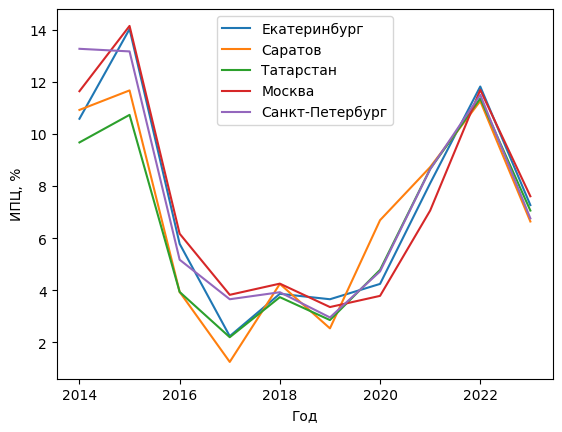

In [24]:
plt.ylabel('ИПЦ, %')
plt.xlabel('Год')
plt.plot (df['Год'],df['ИПЦ'],label='Екатеринбург')
plt.plot (df2['Год'],df2['ИПЦ'],label='Саратов')
plt.plot (df3['Год'],df3['ИПЦ'],label='Татарстан')
plt.plot (df4['Год'],df4['ИПЦ'],label='Москва')
plt.plot (df5['Год'],df5['ИПЦ'],label='Санкт-Петербург')
plt.legend()

In [127]:
df = pd.read_excel('инфляция\ЦеныНаПродукты.xlsx', sheet_name = 'Продовольство') # читается файл цен на продовольственные продукты
df

,Name,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Говядина,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04,416.46,484.17,519.83
1,Свинина,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14,311.84,307.92,344.82
2,Куры охлажденные и мороженые,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55,183.54,178.22,227.58
3,Колбаса,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84,450.57,480.16,513.77
4,Консервы мясные,79.33,94.42,117.04,121.37,125.21,130.13,139.47,153.50,167.04,580.06,603.15
5,Рыба мороженая неразделанная,90.79,110.65,138.16,147.68,153.03,152.14,170.13,181.08,192.61,207.56,227.37
6,"Рыба соленая, маринованная, копченая",252.52,292.21,352.58,382.54,388.83,398.24,424.54,453.54,525.66,597.77,629.34
7,Консервы рыбные,60.50,70.12,91.94,103.94,109.09,113.71,119.69,135.03,156.01,534.69,548.64
8,Масло сливочное,308.92,357.54,397.75,477.13,528.83,553.02,613.39,638.69,719.21,835.77,862.87
9,Масло подсолнечное,75.47,78.09,107.62,110.10,100.16,101.51,98.57,124.94,136.33,132.94,129.59


In [128]:
df_Rice = Change_Price ('Рис', 2014, 'инфляция\ЦеныНаПродукты.xlsx')
df_Pasta = Change_Price ('Макаронные изделия', 2014, 'инфляция\ЦеныНаПродукты.xlsx')

C:\Users\matve\AppData\Local\Temp\ipykernel_17308\2575740047.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Chage_df = pd.concat([new_df, Chage_df]) #перезапись значения в датафрейм
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\2575740047.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Chage_df = Chage_df.fillna(year-1)
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\2575740047.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this 

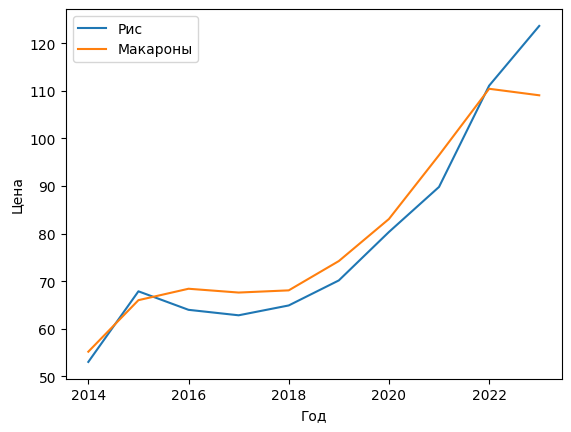

In [109]:
GraphicPlot ('Цена', 'Год', 'Цена' ,'Год', 'Рис', df_Rice)
GraphicPlot ('Цена', 'Год', 'Цена' ,'Год', 'Макароны', df_Pasta)
#Изменение цен на рис и макароны 

C:\Users\matve\AppData\Local\Temp\ipykernel_17308\2575740047.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Chage_df = pd.concat([new_df, Chage_df]) #перезапись значения в датафрейм
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\2575740047.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Chage_df = Chage_df.fillna(year-1)
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\2575740047.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this 

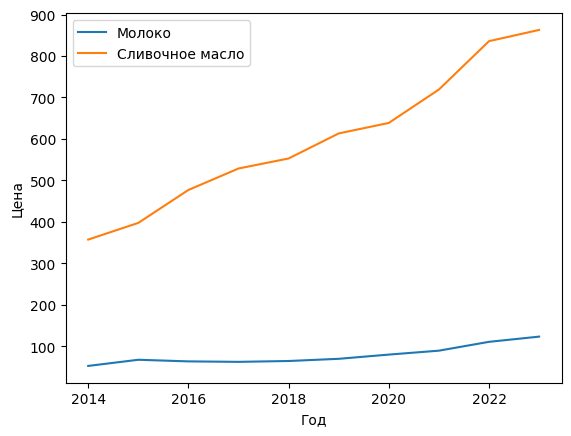

In [122]:
df_Milk = Change_Price ('Молоко', 2014, 'инфляция\ЦеныНаПродукты.xlsx')
df_Cheese = Change_Price ('Сыр', 2014, 'инфляция\ЦеныНаПродукты.xlsx')
df_Butter = Change_Price ('Масло сливочное', 2014, 'инфляция\ЦеныНаПродукты.xlsx')

GraphicPlot ('Цена', 'Год', 'Цена' ,'Год', 'Молоко', df_Rice)
#GraphicPlot ('Цена', 'Год', 'Цена' ,'Год', 'Сыр', df_Cheese)
GraphicPlot ('Цена', 'Год', 'Цена' ,'Год', 'Сливочное масло', df_Butter)
#Изменение цен на молочные продукты 

C:\Users\matve\AppData\Local\Temp\ipykernel_17308\2575740047.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Chage_df = pd.concat([new_df, Chage_df]) #перезапись значения в датафрейм
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\2575740047.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Chage_df = Chage_df.fillna(year-1)
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\2575740047.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this 

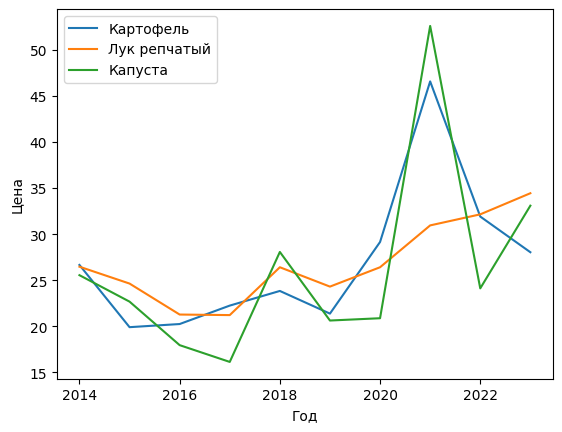

In [156]:
df_Potato = Change_Price ('Картофель', 2014, 'инфляция\ЦеныНаПродукты.xlsx')
df_Onion = Change_Price ('Лук репчатый', 2014, 'инфляция\ЦеныНаПродукты.xlsx')
df_Cabbage = Change_Price ('Капуста', 2014, 'инфляция\ЦеныНаПродукты.xlsx')

GraphicPlot ('Цена', 'Год', 'Цена' ,'Год', 'Картофель', df_Potato)
GraphicPlot ('Цена', 'Год', 'Цена' ,'Год', 'Лук репчатый', df_Onion)
GraphicPlot ('Цена', 'Год', 'Цена' ,'Год', 'Капуста', df_Cabbage)
#Изменение цен на овощи

In [157]:
df_Cabbage

,Год,Цена
0,2023,33.09
1,2022,24.12
2,2021,52.59
3,2020,20.88
4,2019,20.63
5,2018,28.07
6,2017,16.14
7,2016,17.96
8,2015,22.68
9,2014,25.55


C:\Users\matve\AppData\Local\Temp\ipykernel_17308\2575740047.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Chage_df = pd.concat([new_df, Chage_df]) #перезапись значения в датафрейм
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\2575740047.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Chage_df = Chage_df.fillna(year-1)
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\2575740047.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this 

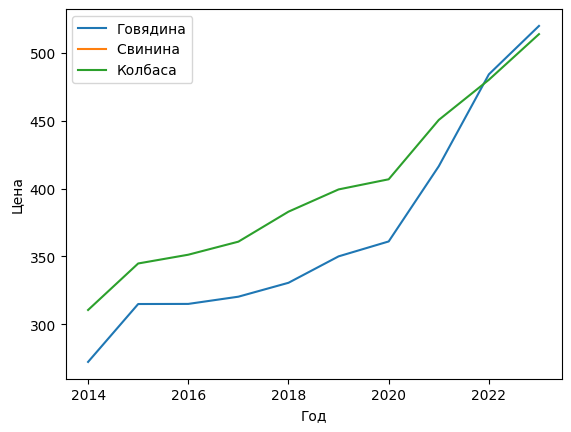

In [176]:
df_Meat1 = Change_Price ('Говядина', 2014, 'инфляция\ЦеныНаПродукты.xlsx')
df_Meat2 = Change_Price ('Свинина ', 2014, 'инфляция\ЦеныНаПродукты.xlsx')
df_Meat3 = Change_Price ('Колбаса', 2014, 'инфляция\ЦеныНаПродукты.xlsx')

GraphicPlot ('Цена', 'Год', 'Цена' ,'Год', 'Говядина', df_Meat1)
GraphicPlot ('Цена', 'Год', 'Цена' ,'Год', 'Свинина ', df_Meat2)
GraphicPlot ('Цена', 'Год', 'Цена' ,'Год', 'Колбаса', df_Meat3)
#Изменение цен на мясные продукты

In [174]:
df_Meat3

,Год,Цена
0,2023,513.77
1,2022,480.16
2,2021,450.57
3,2020,406.84
4,2019,399.37
5,2018,382.98
6,2017,360.88
7,2016,351.27
8,2015,344.81
9,2014,310.54


C:\Users\matve\AppData\Local\Temp\ipykernel_17308\1561756885.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Chage_df = pd.concat([new_df, Chage_df]) #перезапись значения в датафрейм
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\1561756885.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Chage_df = Chage_df.fillna(year-n)
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\1561756885.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this 

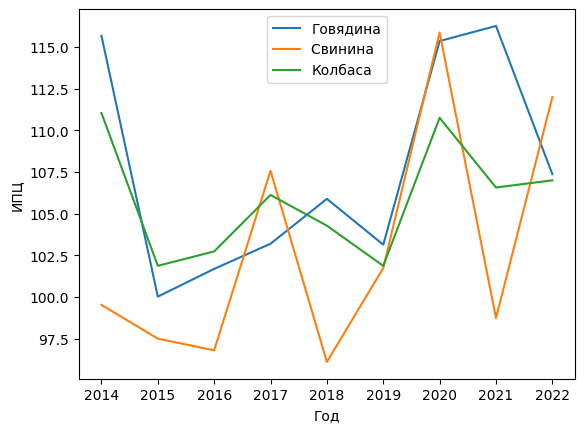

In [212]:
df_Meat1 = Change_Inf_Price ('Говядина', 2014, 'инфляция\ЦеныНаПродукты.xlsx')
df_Meat2 = Change_Inf_Price ('Свинина', 2014, 'инфляция\ЦеныНаПродукты.xlsx')
df_Meat3 = Change_Inf_Price ('Колбаса', 2014, 'инфляция\ЦеныНаПродукты.xlsx')

GraphicPlot ('ИПЦ', 'Год', 'ИПЦ' ,'Год', 'Говядина', df_Meat1)
GraphicPlot ('ИПЦ', 'Год', 'ИПЦ' ,'Год', 'Свинина ', df_Meat2)
GraphicPlot ('ИПЦ', 'Год', 'ИПЦ' ,'Год', 'Колбаса', df_Meat3)
#На основе двух графиков стало понятно что ИПЦ соответствует изменению цены и показывает идентичную изменяемость но в процентном соотношении 

In [213]:
df_Meat3

,Год,ИПЦ
0,2022,106.999750
1,2021,106.567237
2,2020,110.748697
3,2019,101.870446
4,2018,104.279597
5,2017,106.123919
6,2016,102.735787
7,2015,101.873496
8,2014,111.035615


C:\Users\matve\AppData\Local\Temp\ipykernel_17308\4085218422.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Chage_df = pd.concat([new_df, Chage_df]) #перезапись значения в датафрейм
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\4085218422.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Chage_df = Chage_df.fillna(year-n)
C:\Users\matve\AppData\Local\Temp\ipykernel_17308\4085218422.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this 

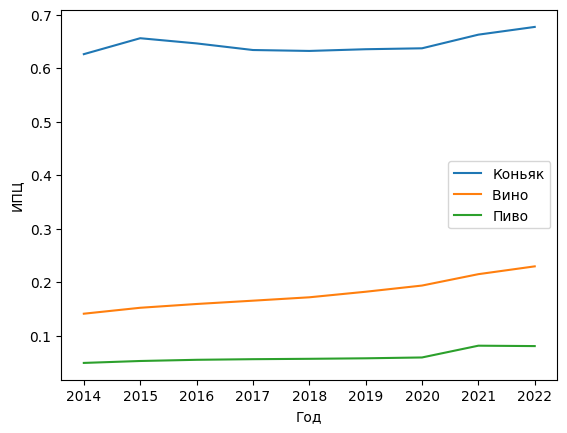

In [166]:
df_Brandy = Change_Inf_Price ('Коньяк', 2014, 'инфляция\ЦеныНаПродукты.xlsx')
df_Vine = Change_Inf_Price ('Вино', 2014, 'инфляция\ЦеныНаПродукты.xlsx')
df_Bear = Change_Inf_Price ('Пиво', 2014, 'инфляция\ЦеныНаПродукты.xlsx')

GraphicPlot ('ИПЦ', 'Год', 'ИПЦ' ,'Год', 'Коньяк', df_Brandy)
GraphicPlot ('ИПЦ', 'Год', 'ИПЦ' ,'Год', 'Вино ', df_Vine)
GraphicPlot ('ИПЦ', 'Год', 'ИПЦ' ,'Год', 'Пиво', df_Bear)

In [167]:
df_Vine

,Год,ИПЦ
0,2022,0.229426
1,2021,0.214814
2,2020,0.193515
3,2019,0.181947
4,2018,0.171556
5,2017,0.165235
6,2016,0.159043
7,2015,0.151970
8,2014,0.140874
